In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

Для выполнения домашнего задания выбраны данные приложений из Google Play с сайта [Kaggle Datasets]

In [3]:

df = pd.read_csv(
    'https://raw.githubusercontent.com/netellania/Stpy22_PashNa/main/googleplaystore.csv',
    delimiter=',')


In [4]:
print(df.shape)

(10841, 13)


In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# изменение типа данных
df['Rating'] = df['Rating'].astype('object')



In [8]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, 19.0], dtype=object)

In [9]:
#заменяемзапятые на точки и исключаем символ +, заменяем Free на NaN
#df['Installs']=df['Installs'].str.replace('Free', np.NaN)
df['Installs']=df['Installs'].str.replace('+', '')
df['Installs']=df['Installs'].str.replace(',', '')
df['Installs']=df['Installs'].replace('Free', np.NaN)
df['Installs']=df['Installs'].astype('float64')
df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00,    nan])

In [10]:
df['Type'] = df['Type'].replace('...', np.NaN)
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [11]:
df['Content Rating'].unique()


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [12]:
# исправим типы данных
df['Price']=df['Price'].replace('Everyone', np.NaN)
df['Price']=df['Price'].str.replace('$','').astype('float64')
df['Price'].unique()

#df['Price'] = df['Price'].astype('float64')
#df['User_Count'] = df['User_Count'].astype('Int64')
#df['User_Score'] = df['User_Score'].astype('float64')
#df['Critic_Count'] = df['Critic_Count'].astype('Int64')
#df['Critic_Score'] = df['Critic_Score'].astype('float64')

# переводим оценки в один формат
#df['User_Score'] = df['User_Score'] * 10


array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

In [13]:
df['Reviews'].unique()


array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [14]:
df.describe()

,Installs,Price
count,1.084000e+04,10840.000000
mean,1.546434e+07,1.027368
std,8.502936e+07,15.949703
min,0.000000e+00,0.000000
25%,1.000000e+03,0.000000
50%,1.000000e+05,0.000000
75%,5.000000e+06,0.000000
max,1.000000e+09,400.000000


<AxesSubplot:title={'center':'Распределение приложений по рейтингу'}, ylabel='Frequency'>

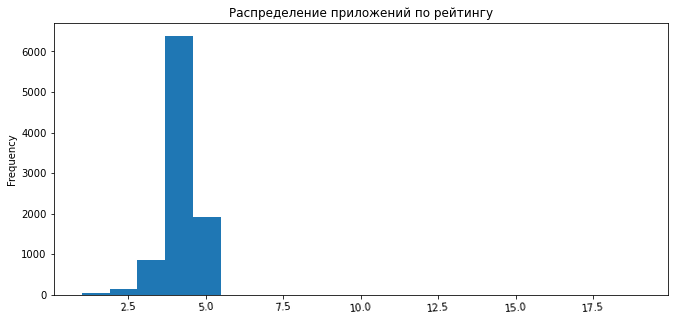

In [15]:
# Визуализация1
# распределение приложений по рейтингу
df['Rating'].plot(kind='hist', 
                     title='Распределение приложений по рейтингу', 
                     bins=20,
                     rot=5,
                     fontsize=10)
#Вывод: Больше всего приложений имеют рейтинг меньше 5 и больше 3. 
#Можно делать предположения относительно популярности приложений

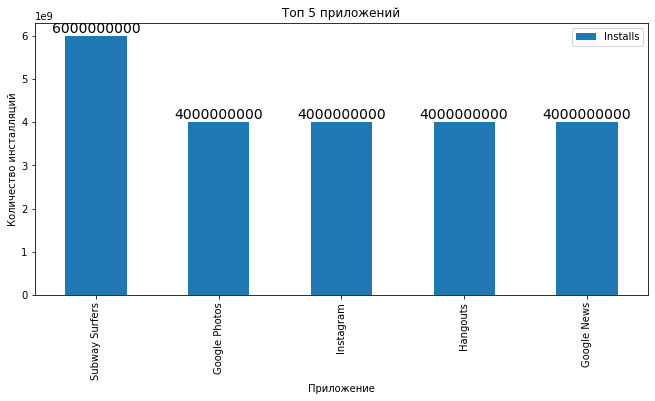

In [222]:
# Визуализация2
# топ-5 приложений по количеству инсталлций
top5_instal = df[['App', 'Installs']].groupby('App').sum().sort_values('Installs', ascending=False).head(5)
top5_instal.plot(kind='bar', title='Топ 5 приложений',
                             xlabel='Приложение',
                             ylabel='Количество инсталляций')
for i, val in enumerate(top5_instal.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

    #Вывод: Самые часто устанавливаемые приложения.
    #Исходя из этого можно планирваоть выпуск соотвествующих лицензий    
    

In [58]:
#Визуализация3
#Количество райтинговых оценок,выставленных за контент 
dynamics_by_app = df[[ 'App', 'Content Rating','Rating' ]] \
    .groupby('Content Rating').count()
dynamics_by_app

,App,Rating
Content Rating,,
Adults only 18+,3,3
Everyone,8714,7420
Everyone 10+,414,397
Mature 17+,499,461
Teen,1208,1084
Unrated,2,1


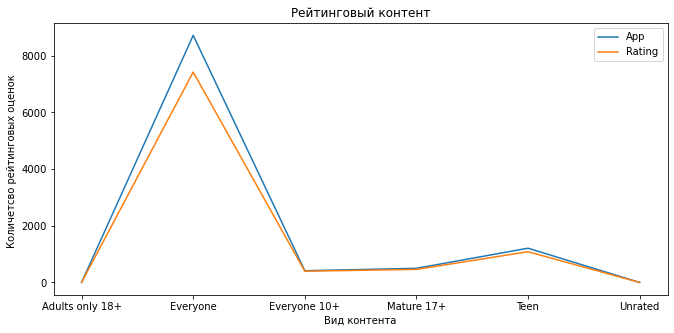

In [59]:
for Genres in dynamics_by_app.columns:
    plt.plot(dynamics_by_app.index, dynamics_by_app[Genres])
plt.title('Рейтинговый контент')
plt.xlabel('Вид контента')
plt.ylabel('Количетсво рейтинговых оценок ') 
plt.legend(dynamics_by_app)

In [ ]:
#Вывод:Можно говорить о том,какой тип контента лидирует по количеству
#выставленныхоценок и количетву созданных приложений. Это Evryone

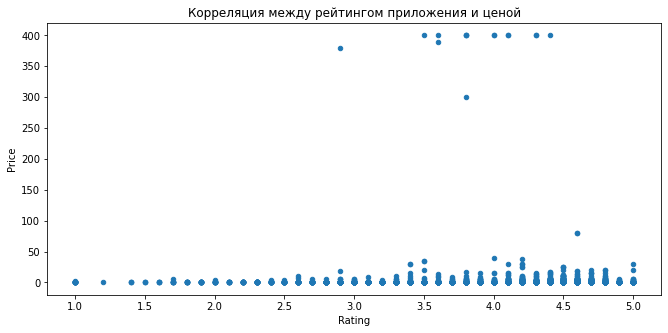

In [73]:
# Визуализация 4
# посмотрим на взаимосвязь рейтинга и количеством отзывов
df.plot(kind='scatter', 
        x='Rating', 
        y='Price', 
        title='Корреляция между рейтингом приложения и ценой')
plt.show()

#Вывод:по данной картине можно судить о взаимосвязи цены и популярности приложений
# о том,в каком ценовом сегменте находятся приложения с самым высоким рейтингом